In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import re
import os
import cv2
import pandas as pd
import cupy as cp
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from cuml.neighbors import NearestNeighbors
from cuml.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2024-09-10 20:00:02.947044: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 20:00:02.955320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1725962402.966042    9254 cuda_dnn.cc:8322] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1725962402.970466    9254 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 20:00:02.984442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

**Label 0**: this is when i was working, not really doing anything to capture in particular.

**Label 1**: me holding a thumb up

**Label 2**: me holding a peace gesture.

# Combining the pictures to the corresponding labels in matrix forms.

## Label 0

In [2]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/0"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_images = pd.DataFrame(image_data)
df_images.head()

,Filename,ImageMatrix
0,1000_2024-09-10 123040.jpg,"[[[0.39215686274509803, 0.4588235294117647, 0...."
1,1001_2024-09-10 123041.jpg,"[[[0.403921568627451, 0.4549019607843137, 0.50..."
2,1002_2024-09-10 123042.jpg,"[[[0.3764705882352941, 0.4549019607843137, 0.5..."
3,1003_2024-09-10 123043.jpg,"[[[0.39215686274509803, 0.45098039215686275, 0..."
4,1004_2024-09-10 123044.jpg,"[[[0.3843137254901961, 0.45098039215686275, 0...."


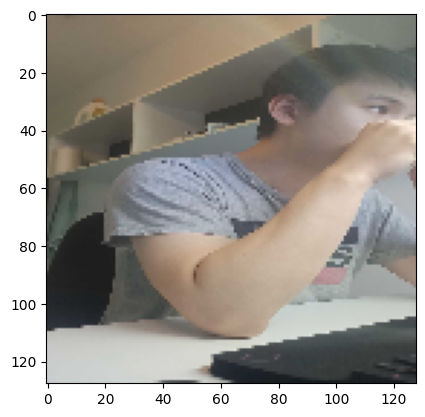

In [3]:
image_uint8 = (df_images.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

Add that to csv of label 0

In [4]:
df0 = pd.read_csv('0/1.csv')
df0['ImageMatrix'] = df_images['ImageMatrix']
df0['Label'] = 0
df0.head()

,Timestamp,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,ImageMatrix,Label
0,2024-09-10 12:13:31,0.15705,0.105,9.82995,"[[[0.39215686274509803, 0.4588235294117647, 0....",0
1,2024-09-10 12:13:32,0.15705,0.105,9.82995,"[[[0.403921568627451, 0.4549019607843137, 0.50...",0
2,2024-09-10 12:13:33,0.15705,0.105,9.82995,"[[[0.3764705882352941, 0.4549019607843137, 0.5...",0
3,2024-09-10 12:13:34,0.15705,0.105,9.82995,"[[[0.39215686274509803, 0.45098039215686275, 0...",0
4,2024-09-10 12:13:35,0.15705,0.105,9.82995,"[[[0.3843137254901961, 0.45098039215686275, 0....",0


## Label 1

In [5]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/1"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_images = pd.DataFrame(image_data)
df_images.head()

,Filename,ImageMatrix
0,100_2024-09-10 115458.jpg,"[[[0.4470588235294118, 0.5137254901960784, 0.5..."
1,101_2024-09-10 115459.jpg,"[[[0.4235294117647059, 0.5019607843137255, 0.5..."
2,102_2024-09-10 115500.jpg,"[[[0.4392156862745098, 0.4980392156862745, 0.5..."
3,103_2024-09-10 115501.jpg,"[[[0.4235294117647059, 0.5019607843137255, 0.5..."
4,104_2024-09-10 115502.jpg,"[[[0.4235294117647059, 0.5019607843137255, 0.5..."


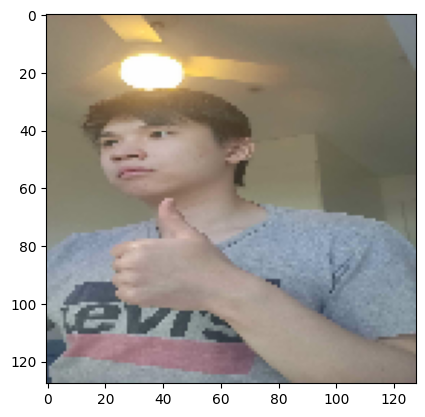

In [6]:
image_uint8 = (df_images.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

In [7]:
# Combine with df1
df1 = pd.read_csv('1/1.csv')
df1['ImageMatrix'] = df_images['ImageMatrix']
df1['Label'] = 1
df1.head()

,Timestamp,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,ImageMatrix,Label
0,2024-09-10 11:53:16,0.15705,1.000,1.00000,"[[[0.4470588235294118, 0.5137254901960784, 0.5...",1
1,2024-09-10 11:53:17,0.15705,0.105,9.82995,"[[[0.4235294117647059, 0.5019607843137255, 0.5...",1
2,2024-09-10 11:53:18,0.15705,0.105,9.82995,"[[[0.4392156862745098, 0.4980392156862745, 0.5...",1
3,2024-09-10 11:53:19,0.15705,0.105,9.82995,"[[[0.4235294117647059, 0.5019607843137255, 0.5...",1
4,2024-09-10 11:53:20,0.15705,0.105,9.82995,"[[[0.4235294117647059, 0.5019607843137255, 0.5...",1


## Label 2

In [8]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/2"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_images = pd.DataFrame(image_data)

# Combine with df0
df2 = pd.read_csv('2/1.csv')
df2['ImageMatrix'] = df_images['ImageMatrix']
df2['Label'] = 2
df2.head()

,Timestamp,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,ImageMatrix,Label
0,2024-09-10 12:02:56,0.15705,0.105,9.82995,"[[[0.8431372549019608, 0.9686274509803922, 1.0...",2
1,2024-09-10 12:02:57,0.15705,0.105,9.82995,"[[[0.8627450980392157, 0.9725490196078431, 1.0...",2
2,2024-09-10 12:02:58,0.15705,0.105,9.82995,"[[[0.8627450980392157, 0.9764705882352941, 1.0...",2
3,2024-09-10 12:02:59,0.15705,0.105,9.82995,"[[[0.8627450980392157, 0.9764705882352941, 1.0...",2
4,2024-09-10 12:03:00,0.15705,0.105,9.82995,"[[[0.8627450980392157, 0.9764705882352941, 1.0...",2


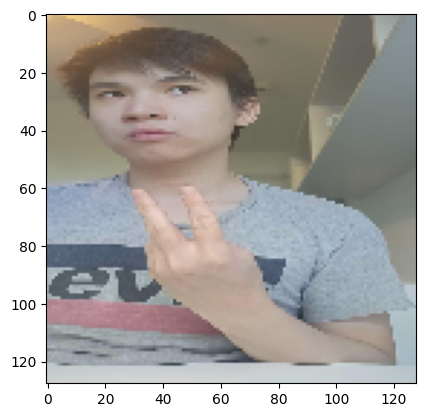

In [9]:
image_uint8 = (df2.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

## Combine the all into one dataframe

In [10]:
df = pd.concat([df0, df1, df2], ignore_index=True)
df.head()

,Timestamp,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,ImageMatrix,Label
0,2024-09-10 12:13:31,0.15705,0.105,9.82995,"[[[0.39215686274509803, 0.4588235294117647, 0....",0
1,2024-09-10 12:13:32,0.15705,0.105,9.82995,"[[[0.403921568627451, 0.4549019607843137, 0.50...",0
2,2024-09-10 12:13:33,0.15705,0.105,9.82995,"[[[0.3764705882352941, 0.4549019607843137, 0.5...",0
3,2024-09-10 12:13:34,0.15705,0.105,9.82995,"[[[0.39215686274509803, 0.45098039215686275, 0...",0
4,2024-09-10 12:13:35,0.15705,0.105,9.82995,"[[[0.3843137254901961, 0.45098039215686275, 0....",0


In [11]:
# # Save df to a CSV file
# df.to_csv('df.csv', index=False)

In [12]:
df.Label.value_counts()

Label
0    1753
2     298
1     295
Name: count, dtype: int64

I ran label 1 and 2 for 5 minutes each, label 0 runs for the rest of the times.

# Looking at the Accelerometer of each label

I will convert the accelerometer axes into Accelerometer Linear or the magnitude of the accelerometer

<Axes: xlabel='Timestamp', ylabel='Magnitude'>

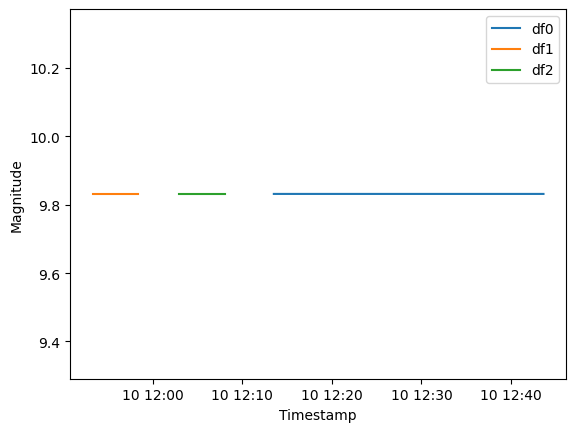

In [13]:
# Convert 'Timestamp' column to datetime
df0['Timestamp'] = pd.to_datetime(df0['Timestamp'])
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# I have noticed a typo in the first sample of df1, so I will remove that
df1 = df1.drop(df1.index[0])

# Create 'Magnitude' feature
df0['Magnitude'] = np.sqrt(np.square(df0['Accelerometer_X']) + 
                           np.square(df0['Accelerometer_Y']) + 
                           np.square(df0['Accelerometer_Z']))

df1['Magnitude'] = np.sqrt(np.square(df1['Accelerometer_X']) + 
                           np.square(df1['Accelerometer_Y']) + 
                           np.square(df1['Accelerometer_Z']))

df2['Magnitude'] = np.sqrt(np.square(df2['Accelerometer_X']) + 
                           np.square(df2['Accelerometer_Y']) + 
                           np.square(df2['Accelerometer_Z']))

sns.lineplot(x='Timestamp', y='Magnitude', data=df0, label='df0')
sns.lineplot(x='Timestamp', y='Magnitude', data=df1, label='df1')
sns.lineplot(x='Timestamp', y='Magnitude', data=df2, label='df2')

There doesn't seem to be any different the position of the axes while the camera was on.

# Use deep learning to see the patterns in picture matrcies

## CNN

In [15]:
# Split data
X = cp.array([cp.asarray(image) for image in df['ImageMatrix'].values])
y = cp.array(df['Label'].values)

In [32]:
# # Oversample X and y
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X.get(), y.get())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train.get(), num_classes=3)
y_test = to_categorical(y_test.get(), num_classes=3)

In [41]:
X_test.shape, y_train.shape

((469, 128, 128, 3), (1877, 3))

In [48]:
# Value counts
pd.Series(y_test.argmax(axis=1)).value_counts()

0    357
1     59
2     53
Name: count, dtype: int64

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a basic CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model
model.fit(X_train.get(), y_train, epochs=10, batch_size=32, validation_data=(X_test.get(), y_test))

Epoch 1/10


I0000 00:00:1725958983.533093    1497 service.cc:148] XLA service 0x7ef95c00e2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725958983.534014    1497 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-10 19:03:03.585781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1725958983.718621    1497 cuda_dnn.cc:530] Loaded cuDNN version 90400
I0000 00:00:1725958985.358375    1497 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9183 - loss: 0.5491 - val_accuracy: 1.0000 - val_loss: 2.8798e-07
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.3296e-07 - val_accuracy: 1.0000 - val_loss: 2.0792e-07
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.8333e-07 - val_accuracy: 1.0000 - val_loss: 1.7996e-07
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.5334e-07 - val_accuracy: 1.0000 - val_loss: 1.5251e-07
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.2769e-07 - val_accuracy: 1.0000 - val_loss: 1.3319e-07
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 1.5095e-07 - val_accuracy: 1.0000 - val_loss: 1.1895e-07
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 1.0820e-07 - val_accuracy: 1.0000 - val_loss: 1.0955e-07
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss:

In [38]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test.get(), y_test)
print(f'Test Accuracy: {test_acc}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 7.7136e-08 
Test Accuracy: 1.0


In [54]:
# Save the model
model.save('/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/model.h5')

## Test model on new pictures

In [2]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/model.h5')
model.summary()

I0000 00:00:1725962415.504529    9254 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21770 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,709 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Load testing images

### Label 0

In [3]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/test_image/0"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_test_0 = pd.DataFrame(image_data)
df_test_0['Label'] = 0

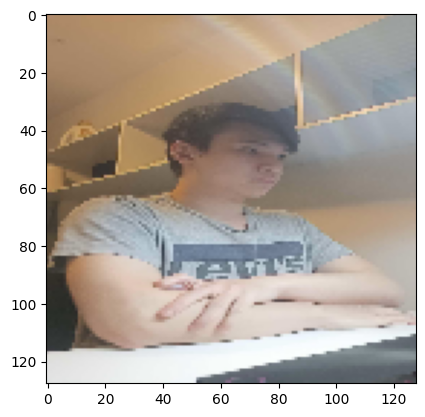

In [4]:
image_uint8 = (df_test_0.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

### Label 1

In [5]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/test_image/1"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_test_1 = pd.DataFrame(image_data)
df_test_1['Label'] = 1

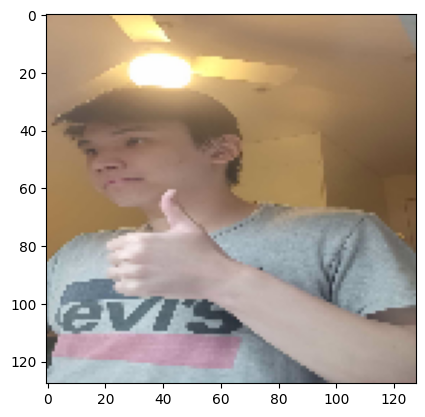

In [6]:
image_uint8 = (df_test_1.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

### Label 2

In [7]:
dir = r"/mnt/c/Users/tomde/OneDrive/Documents/Deakin/Deakin-Data-Science/T1Y2/SIT225 - Data Capture Technologies/Week 8 - Using smartphone to capture sensor data/8.3D/test_image/2"

# Define the image size for the model
image_size = (128,128)

# Function to extract year '2024' from picture names
def contain_2024(filename):
    return re.search(r'2024', filename) is not None

# List all files in the directory
files = os.listdir(dir)

# Filter for image files containing '2024' in the filename
image_filenames_2024 = [file for file in files if file.endswith(('.jpg', '.png')) and contain_2024(file)]
image_filenames_2024

# List to store image matrix
image_data = []

# Loop through the filtered filenames and convert each image to a matrix
for filename in image_filenames_2024:
    img_path = os.path.join(dir, filename)
    
    # Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Resize the image to a uniform size (128x128)
    image_resized = cv2.resize(image, image_size)
    
    # Normalize the image (values between 0 and 1)
    image_resized = image_resized / 255.0
    
    # Convert the image to a CuPy array (move to GPU)
    image_matrix = np.array(image_resized)
    
    # Append the matrix along with the filename
    image_data.append({
        'Filename': filename,
        'ImageMatrix': image_matrix
    })

df_test_2 = pd.DataFrame(image_data)
df_test_2['Label'] = 2

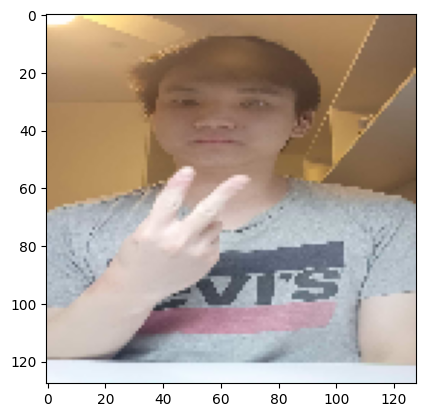

In [8]:
image_uint8 = (df_test_2.ImageMatrix[0] * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))

### Combine and Split for prediction

In [9]:
# Combine dataframe
df_test = pd.concat([df_test_0, df_test_1, df_test_2], ignore_index=True)

# Split for prediction
X = cp.array([cp.asarray(image) for image in df_test['ImageMatrix'].values])
y = cp.array(df_test['Label'].values)
y = to_categorical(y.get(), num_classes=3)

In [10]:
X.shape, y.shape

((154, 128, 128, 3), (154, 3))

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X.get(), y)
print(f'Test Accuracy: {test_acc}')

I0000 00:00:1725962433.080016    9472 service.cc:148] XLA service 0x7fe59c007d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725962433.080054    9472 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-10 20:00:33.089594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1725962433.104780    9472 cuda_dnn.cc:530] Loaded cuDNN version 90400


1/5 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0282

I0000 00:00:1725962434.075708    9472 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9640 - loss: 0.0989
Test Accuracy: 0.9155844449996948


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Number of misclassified images: 13


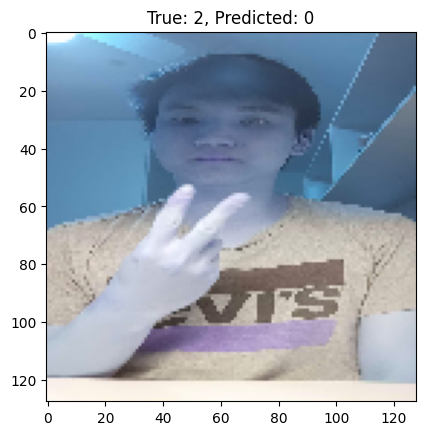

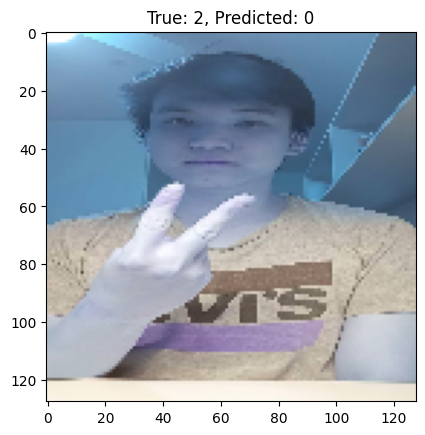

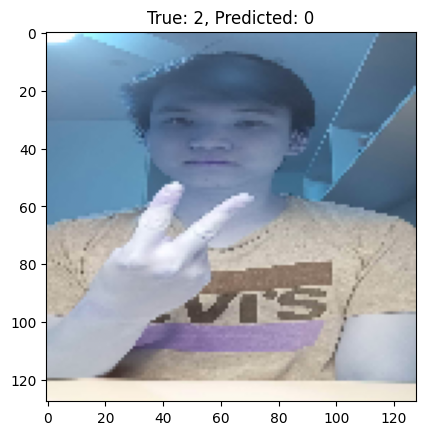

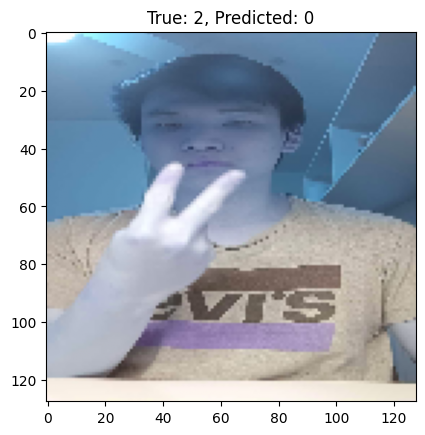

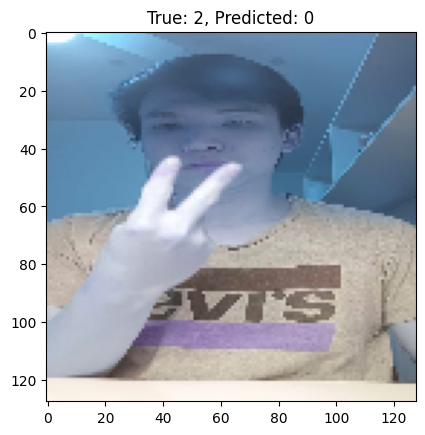

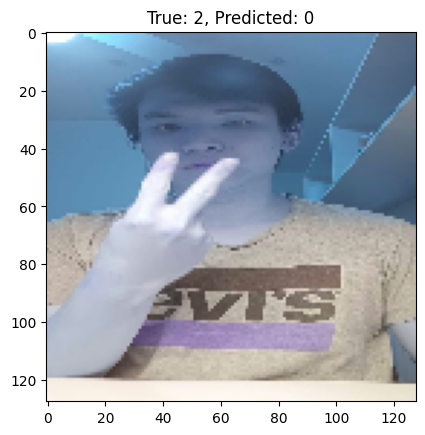

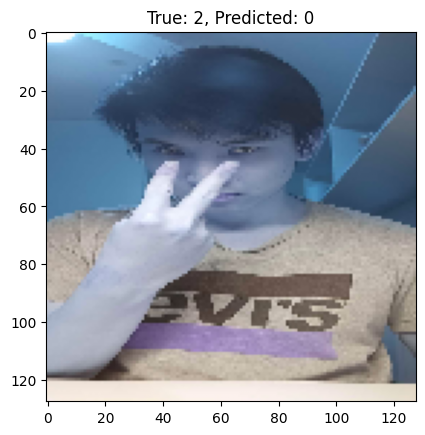

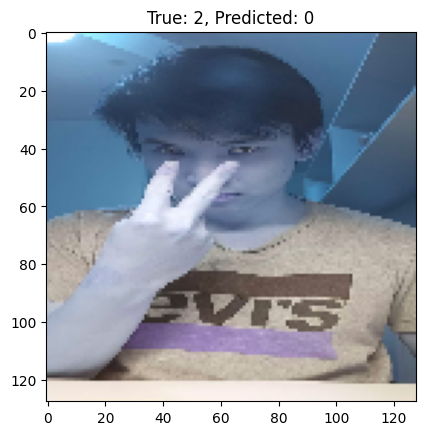

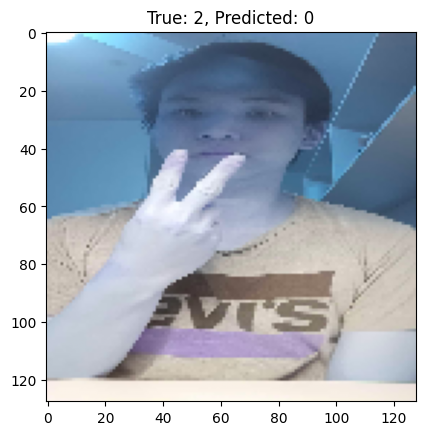

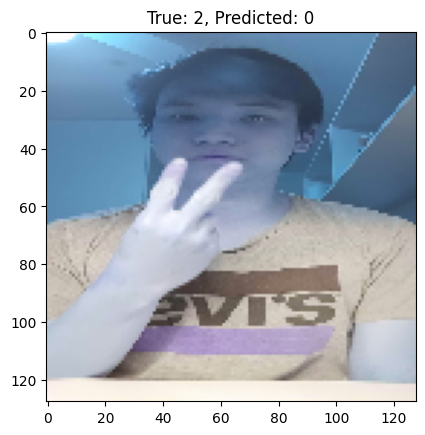

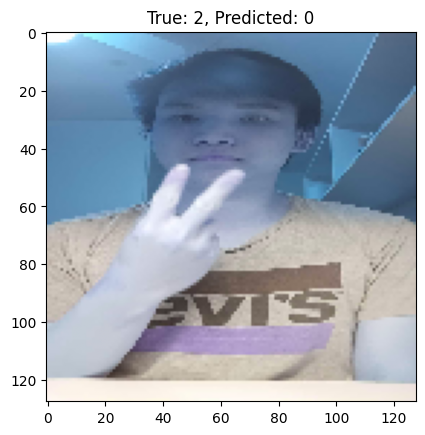

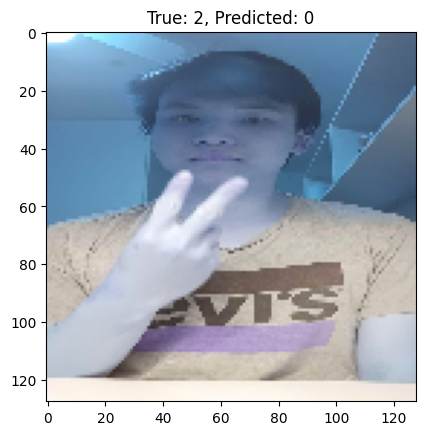

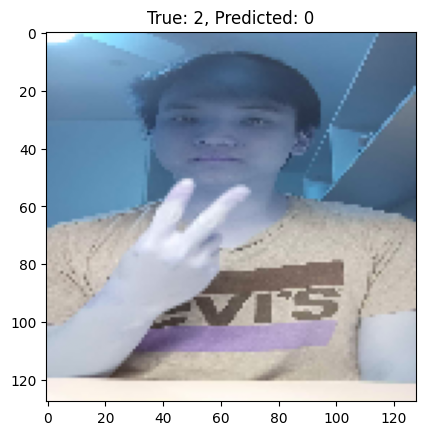

In [13]:
# Get predictions
predictions = model.predict(X.get())

# Convert predictions from one-hot encoded to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Compare predicted classes with true labels
true_classes = np.argmax(y, axis=1)

# Find indices of misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Print how many images were misclassified
print(f'Number of misclassified images: {len(misclassified_indices)}')

# Display some misclassified images
for i in misclassified_indices:
    plt.imshow(X.get()[i]) 
    plt.title(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}')
    plt.show()